# What is Machine Learning?

“Learning is any process by which a system improves performance from experience.”  -Herbert Simon
<br>
<br>
Definition by Tom Mitchell (1998):
Machine Learning is the study of algorithms that
- improve their performance P
- at some task T
- with experience E.
A well-defined learning task is given by <P, T, E>
<br>
<br>

### Some examples of tasks that are best solved by using a learning algorithm

#### Recognizing patterns
- Facial identities or facial expressions
- Handwritten or spoken words
- Medical images

#### Generating patterns
- Generating images or motion sequences

#### Prediction
- Future stock prices or currency exchange rates

### Types of Learning
* Supervised (inductive) learning

   Given: training data + desired outputs (labels)
 
* Unsupervised learning

   Given: training data (without desired outputs)
 
* Semi-supervised learning

  Given: training data + a few desired outputs
 
* Reinforcement learning

 Rewards from sequence of actions

Supervised Learning: Regression

Prediction of numerical target values

Commonality with models for classification
- First, construct a model
- Second, use model to predict unknown value
- Major method for prediction is regression in all its flavors

    Simple and multiple regression
    
    Linear and non-linear regression

Given (x1, y1), (x2, y2), ..., (xn, yn)
• Learn a function f(x) to predict y given x
– y is real-valued == regression


Predicts the values of the target variable y
based on a linear combination of
the values of the input feature(s) xj

Two input features: j𝑦 = 𝑎0 + 𝑎1x1 + 𝑎2𝑥2
p input features: j𝑦 = 𝑎# + 𝑎;𝑥; + 𝑎%𝑥% + ⋯+ 𝑎9𝑥9

What is the best Fit Line?
Our primary objective while using linear regression is to locate the best-fit line, which implies that the error between the predicted and actual values should be kept to a minimum. There will be the least error in the best-fit line.

https://www.geeksforgeeks.org/ml-linear-regression/

<img src="ml_tutorial/images/Image1.png">

In [65]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [3]:
# Get dataset 
# https://www.kaggle.com/datasets/karthickveerakumar/salary-data-simple-linear-regression
df_sal = pd.read_csv('Salary_Data.csv')
df_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
# Describe data
df_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


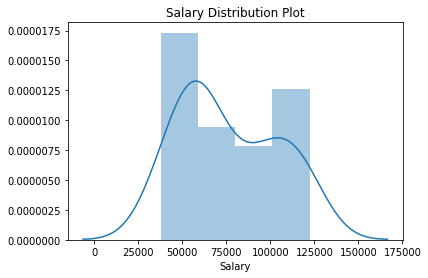

In [7]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

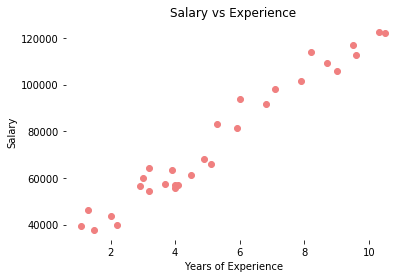

In [8]:
# Relationship between Salary and Experience
plt.scatter(df_sal['YearsExperience'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

In [35]:
# Splitting variables
X = df_sal.iloc[:, :1]  # independent
y = df_sal.iloc[:, 1:]  # dependent

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5       Salary
0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
5    56642.0
6    60150.0
7    54445.0
8    64445.0
9    57189.0
10   63218.0
11   55794.0
12   56957.0
13   57081.0
14   61111.0
15   67938.0
16   66029.0
17   83088.0
18   81363.0
19   93940.0
20   91738.0
21   98273.0
22  101302.0
23  113812.0
24  109431.0
25  105582.0
26  116969.0
27  112635.0
28 

In [36]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [48]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'verbose'

In [12]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

In [14]:
print(X_test)
type(X_test)

    YearsExperience
2               1.5
28             10.3
13              4.1
10              3.9
26              9.5
24              8.7


pandas.core.frame.DataFrame

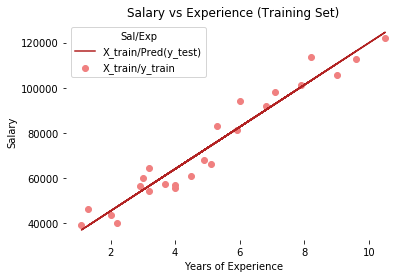

In [15]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

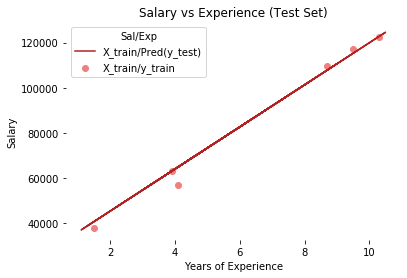

In [16]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [61]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(LinearRegression(), X_train, y_train, train_sizes=[2, 4, 8], cv=10)


In [66]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([naive_bayes, svc]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

ImportError: cannot import name 'LearningCurveDisplay' from 'sklearn.model_selection' (C:\Users\Aditya\Anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)

In [62]:
train_scores


array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.90162741, 0.91102644, 0.93209563, 0.93209563, 0.93209563,
        0.93209563, 0.93209563, 0.93209563, 0.93209563, 0.93209563],
       [0.91660515, 0.91709278, 0.94088883, 0.90602905, 0.90602905,
        0.90602905, 0.90602905, 0.90602905, 0.90602905, 0.90602905]])

In [63]:
valid_scores

array([[  0.90481781,   0.83745193,   0.70256273,   0.87112137,
         -0.05272501,  -3.52584725, -16.41473879,   0.96601992,
          0.83304636,   0.82740954],
       [  0.91076488,   0.91574716,   0.85225083,   0.96631244,
          0.6039492 ,  -0.94413461,  -0.80614314,   0.98972579,
          0.96681061,   0.3062191 ],
       [  0.90336665,   0.90610433,   0.84704328,   0.9807772 ,
          0.56454608,  -1.06160893,  -3.65033925,   0.99480259,
          0.96780634,   0.07739566]])

In [6]:
class LinearRegression: 
    def __init__(self): 
        self.parameters = {} 

    def forward_propagation(self, train_input): 
        m = self.parameters['m'] 
        c = self.parameters['c'] 
        predictions = np.multiply(m, train_input) + c 
        return predictions 

    def cost_function(self, predictions, train_output): 
        cost = np.mean((train_output - predictions) ** 2) 
        return cost 

    def backward_propagation(self, train_input, train_output, predictions): 
        derivatives = {} 
        df = (predictions-train_output) 
        # dm= 2/n * mean of (predictions-actual) * input 
        dm = 2 * np.mean(np.multiply(train_input, df)) 
        # dc = 2/n * mean of (predictions-actual) 
        dc = 2 * np.mean(df) 
        derivatives['dm'] = dm 
        derivatives['dc'] = dc 
        return derivatives 

    def update_parameters(self, derivatives, learning_rate): 
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm'] 
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc'] 

    def train(self, train_input, train_output, learning_rate, iters): 
        # Initialize random parameters 
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        # Initialize loss 
        self.loss = [] 

        # Initialize figure and axis for animation 
        fig, ax = plt.subplots() 
        x_vals = np.linspace(min(train_input), max(train_input), 100) 
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], color='red', label='Regression Line') 
        ax.scatter(train_input, train_output, marker='o', 
                color='green', label='Training Data') 

        # Set y-axis limits to exclude negative values 
        ax.set_ylim(0, max(train_output) + 1) 

        def update(frame): 
            # Forward propagation 
            predictions = self.forward_propagation(train_input) 

            # Cost function 
            cost = self.cost_function(predictions, train_output) 

            # Back propagation 
            derivatives = self.backward_propagation( 
                train_input, train_output, predictions) 

            # Update parameters 
            self.update_parameters(derivatives, learning_rate) 

            # Update the regression line 
            line.set_ydata(self.parameters['m'] 
                        * x_vals + self.parameters['c']) 

            # Append loss and print 
            self.loss.append(cost) 
            print("Iteration = {}, Loss = {}".format(frame + 1, cost)) 

            return line, 
        # Create animation 
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True) 

        # Save the animation as a video file (e.g., MP4) 
        ani.save('linear_regression_A.gif', writer='ffmpeg') 

        plt.xlabel('Input') 
        plt.ylabel('Output') 
        plt.title('Linear Regression') 
        plt.legend() 
        plt.show() 

        return self.parameters, self.loss

In [7]:
train_input = X_train.to_numpy()
train_output = y_train.to_numpy()
print(train_input.shape, train_output.shape)

(24, 1) (24, 1)


MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


Iteration = 1, Loss = 6074114974.581463
Iteration = 1, Loss = 2811134263.94428
Iteration = 1, Loss = 1348573303.1176965
Iteration = 2, Loss = 692859143.9366665
Iteration = 3, Loss = 398728926.38774014
Iteration = 4, Loss = 266641170.05918923
Iteration = 5, Loss = 207172733.96726254
Iteration = 6, Loss = 180249250.5254593
Iteration = 7, Loss = 167911664.17938092
Iteration = 8, Loss = 162111743.75983137
Iteration = 9, Loss = 159242725.62335286
Iteration = 10, Loss = 157688259.14489117
Iteration = 11, Loss = 156723983.56631473
Iteration = 12, Loss = 156025277.24630165
Iteration = 13, Loss = 155446658.88590154
Iteration = 14, Loss = 154922927.71107256
Iteration = 15, Loss = 154424860.12810138
Iteration = 16, Loss = 153939355.48560348
Iteration = 17, Loss = 153460538.5347974
Iteration = 18, Loss = 152985772.05845058
Iteration = 19, Loss = 152513869.958007
Iteration = 20, Loss = 152044296.460854
Iteration = 21, Loss = 151576807.25051898
Iteration = 22, Loss = 151111288.6415778
Iteration = 23

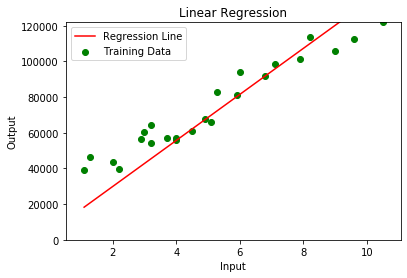

In [30]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.005, 40)

In [12]:
print(loss)

[6074893361.464541, 5318837602.020677, 4659434494.793614, 4084326515.124767, 3582736110.973032, 3145263695.348212, 2763711466.443286, 2430929753.2623496, 2140683006.744604, 1887532924.6073933, 1666736519.274827, 1474157218.3422146, 1306187331.3000317, 1159680429.283129, 1031892370.4142739, 920429865.358648, 823205619.034831, 738399207.6870852, 664422958.0237099, 599892188.8817838, 543599257.6470153, 494490924.971338, 451648613.5269358, 414271190.77937007, 381659953.0710702, 353205529.56642526, 328376460.59436446, 306709236.3081574, 287799608.9534225, 271295015.9070315, 256887971.46917713, 244310303.54856792, 233328127.21684846, 223737460.91975188, 215360403.17804065, 208041798.1167548, 201646327.3235704, 196055973.52791727, 191167808.5616715, 186892064.14036843, 183150449.3048884, 179874682.9868137]


In [13]:
print(parameters)

{'m': 12397.083337392007, 'c': 2380.998728694706}


Text(0.5, 1.0, 'Iteration vs Loss (Test Set)')

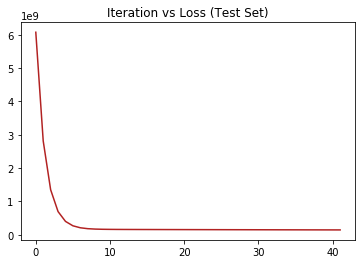

In [31]:
plt.plot(loss, color = 'firebrick')
plt.title('Iteration vs Loss (Test Set)')

In [33]:
train_input

array([[ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])